**Engy-4390** Nuclear Systems Design and Analysis, UMass Lowell, Chem. Eng. Nuclear Program Fall 2024

## Uranium Mill Network Dynamics Simulation

### Stand-Alone Solvent Extraction Module

In [1]:
"""Setup a White Mesa plant"""

from cortix import Cortix
from cortix import Network
from cortix import Units as unit
white_mesa = Cortix(use_mpi=False, splash=True)   # system top level, establish system
wm_net = white_mesa.network = Network()           # creating system network

# help(white_mesa.network)

[12838] 2024-12-02 18:58:32,043 - cortix - INFO - Created Cortix object 
_____________________________________________________________________________
                             L A U N C H I N G                               
_____________________________________________________________________________
      ...                                        s       .     (TAAG Fraktur)
   xH88"`~ .x8X                                 :8      @88>
 :8888   .f"8888Hf        u.      .u    .      .88      %8P      uL   ..
:8888>  X8L  ^""`   ...ue888b   .d88B :@8c    :888ooo    .     .@88b  @88R
X8888  X888h        888R Y888r ="8888f8888r -*8888888  .@88u  ""Y888k/"*P
88888  !88888.      888R I888>   4888>"88"    8888    888E`    Y888L
88888   %88888      888R I888>   4888> "      8888      888E      8888
88888 `> `8888>     888R I888>   4888>        8888      888E      `888N
`8888L %  ?888   ! u8888cJ888   .d888L .+    .8888Lu=   888E   .u./"888&
 `8888  `-*""   /   "*888*P"    ^"8888*"     ^%

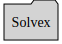

In [2]:
"""Setup Solvent Extraction"""
import src.solvex
solvex = src.solvex.Solvex()
wm_net.module(solvex)
wm_net.draw(engine='circo', node_shape='folder', ports=True)

Documentation options:
 + Live in this notebook run on *code* cell: `help(src.solvex)`
 + On the web: [source](https://github.com/dpploy/engy-4390/blob/main/projects/2024/u-mill/src/solvex.py)

In [3]:
'''Initialize run'''
end_time = 20*unit.day
time_step = 2.0*unit.hour
show_time = (True, unit.hour)

solvex.end_time = end_time
solvex.time_step = time_step
solvex.show_time = show_time

In [4]:
white_mesa.run()
white_mesa.close()

[12838] 2024-12-02 18:58:32,460 - cortix - INFO - Launching Module <src.solvex.Solvex object at 0x7f09b8b2e180>
[12859] 2024-12-02 18:58:34,437 - cortix - INFO - Solvex::run():time[d]=0.0
[12859] 2024-12-02 18:58:34,458 - cortix - INFO - Solvex::run():time[d]=0.1
[12838] 2024-12-02 18:58:39,773 - cortix - INFO - run()::Elapsed wall clock time [s]: 7.73
[12838] 2024-12-02 18:58:39,775 - cortix - INFO - Closed Cortix object.
_____________________________________________________________________________
                           T E R M I N A T I N G                             
_____________________________________________________________________________
      ...                                        s       .     (TAAG Fraktur)
   xH88"`~ .x8X                                 :8      @88>
 :8888   .f"8888Hf        u.      .u    .      .88      %8P      uL   ..
:8888>  X8L  ^""`   ...ue888b   .d88B :@8c    :888ooo    .     .@88b  @88R
X8888  X888h        888R Y888r ="8888f8888r -*888888

In [5]:
"""Recover modules data"""
solvex = wm_net.modules[0]

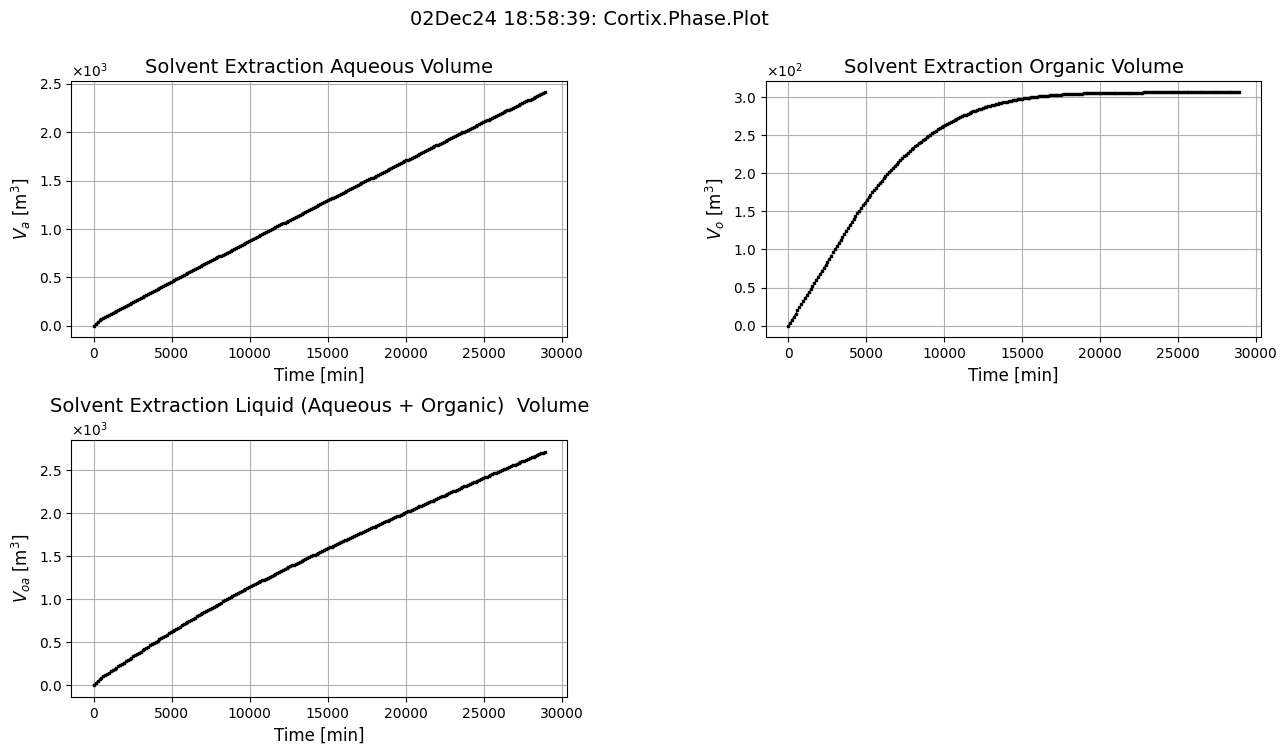

In [6]:
"""Solvent Extraction Data"""
solvex.solvex_state_phase.plot(['aqueous-volume', 'organic-volume', 'liquid-volume'], show=True,figsize=[14,8])

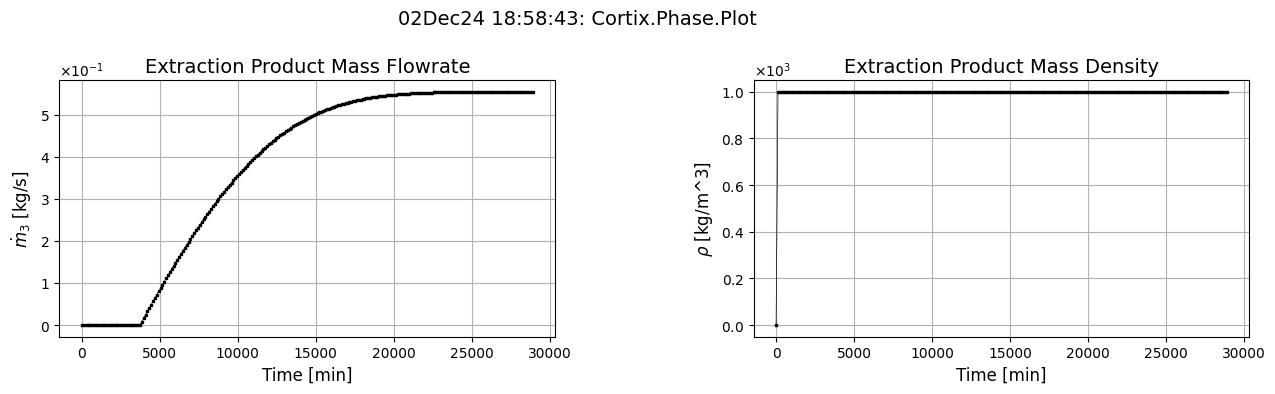

In [7]:
solvex.solvex_product_phase.plot(['mass-flowrate', 'mass-density'], show=True, figsize=[14,8])

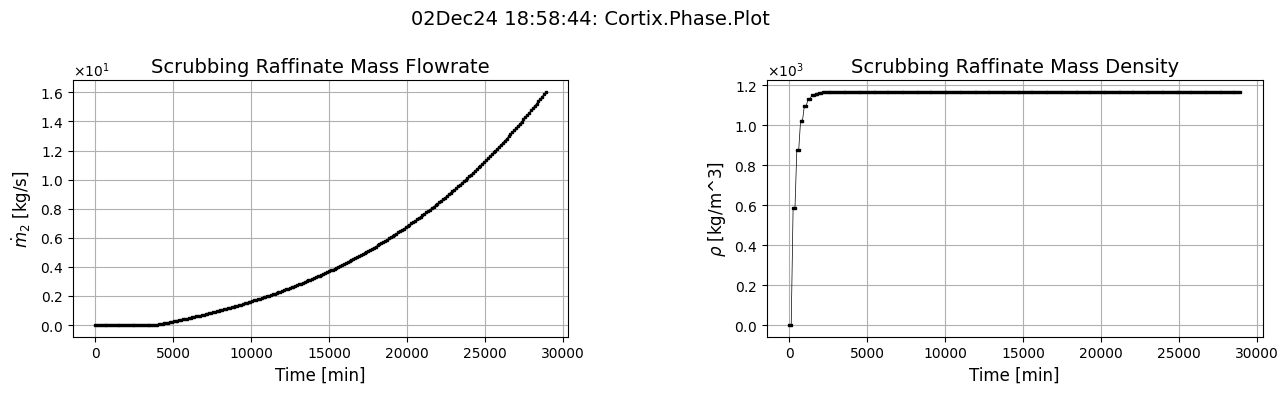

In [8]:
solvex.scrub_raffinate_phase.plot(['mass-flowrate', 'mass-density'], show=True, figsize=[14,8])